# 6.3 Linear Regression with Scikit-Learn

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## Step 1: Loading the Data

In [2]:
housing = pd.read_csv('housing.csv')

## Step 2: Examine the data

In [3]:
housing.head()

,Floor Area (sqft),Value ($1000)
0,665.0,161.0
1,442.0,83.0
2,302.0,53.0
3,336.0,57.0
4,673.0,152.0


In [4]:
housing.isnull().sum()

Floor Area (sqft)    0
Value ($1000)        0
dtype: int64

## Step 3: Split the Dataset

In [5]:
X = housing[['Floor Area (sqft)']]
y = housing['Value ($1000)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Visualising the Data

Text(0, 0.5, 'Price in $1000s')

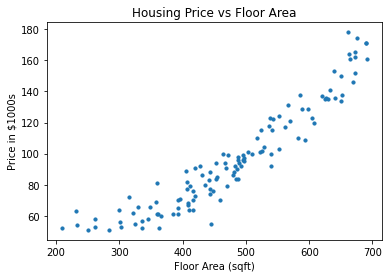

In [6]:
plt.scatter(X_train['Floor Area (sqft)'], y_train, s=10)
plt.title('Housing Price vs Floor Area')
plt.xlabel('Floor Area (sqft)')
plt.ylabel('Price in $1000s')

## Step 6: Train the Model

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(lr.intercept_)
print(lr.coef_)

-29.6514648875731
[0.2640654]


In [9]:
predicted_price = lr.predict([[250], [300]])
print(predicted_price)

[36.3648842  49.56815401]


Text(0, 0.5, 'Price in $1000s')

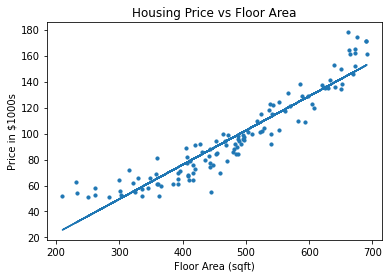

In [10]:
plt.scatter(X_train['Floor Area (sqft)'], y_train, s=10)

y_pred = lr.predict(X_train)
plt.plot(X_train['Floor Area (sqft)'], y_pred)

plt.title('Housing Price vs Floor Area')
plt.xlabel('Floor Area (sqft)')
plt.ylabel('Price in $1000s')

## Step 7: Evaluate the Model

In [11]:
RMSE = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)
print(RMSE)
print(r2)

11.426788012892116
0.8827389714759885


In [12]:
y_pred_test = lr.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)
print(RMSE)
print(r2)

10.413298895214577
0.9229207556091985


# 6.5 Polynomial Regression with Scikit-Learn

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_transformed = poly_features.fit_transform(X_train)

In [14]:
print(X_train_transformed[0])

[1.00000e+00 6.91000e+02 4.77481e+05]


In [15]:
pr = LinearRegression()
pr.fit(X_train_transformed, y_train)
print(pr.intercept_)
print(pr.coef_)

70.91161404547069
[ 0.         -0.18658297  0.00047343]


In [16]:
num_transformed = poly_features.transform([[250]])
predicted_price = pr.predict(num_transformed)
print(predicted_price)

[53.85545111]


Text(0, 0.5, 'Price in $1000s')

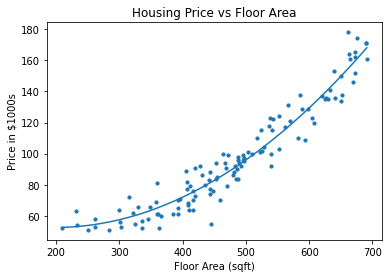

In [17]:
# Plotting the scatter plot
plt.scatter(X_train['Floor Area (sqft)'], y_train, s=10)

# Plotting the curve
y_pred = pr.predict(X_train_transformed)
sorted_zip = sorted(zip(X_train['Floor Area (sqft)'], y_pred))
X_train_sorted, y_pred_sorted = zip(*sorted_zip)
plt.plot(X_train_sorted, y_pred_sorted)

# Labelling the Chart
plt.title('Housing Price vs Floor Area')
plt.xlabel('Floor Area (sqft)')
plt.ylabel('Price in $1000s')


In [18]:
RMSE = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)
print(RMSE)
print(r2)

8.522835594847725
0.9347660644643525


In [19]:
X_test_transformed = poly_features.transform(X_test)
y_pred_test = pr.predict(X_test_transformed)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)
print(RMSE)
print(r2)

6.425083465019807
0.9706560666441122


# 6.6 Pipeline

In [20]:
from sklearn.pipeline import Pipeline

# Creating the pipeline
pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)), ('model', LinearRegression())])

# Training the Model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [21]:
# Using the Model to make predictions
print(pipeline.predict([[250]]))

# Evaluating the model on the train set
y_pred = pipeline.predict(X_train)
print(mean_squared_error(y_train, y_pred, squared=False))
print(r2_score(y_train, y_pred))

# Evaluating the model on the test set
y_pred_test = pipeline.predict(X_test)
print(mean_squared_error(y_test, y_pred_test, squared=False))
print(r2_score(y_test, y_pred_test))

[53.85545111]
8.522835594847725
0.9347660644643525
6.425083465019807
0.9706560666441122


# 6.7 Cross-Validation

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error")
neg_rmse = scores.mean()
-neg_rmse

8.615541039554307

In [23]:
scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="r2")
r2 = scores.mean()
r2

0.9291077625814611